# DAT561 Final Project (Fall 2023)

**Note**: Please be creative in defining the new variables as part of the data manipulation and write your description at the end of each code as the comment. We will read your logic and description for the assessment.


**Part 1**: 
75 points (85 points with the extra credits in the Bonus Question)

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import numpy as np
import pandas as pd

In [3]:
# Read the dataset here
Property_details = pd.read_csv("Property_details.csv")
# You may use Tkinter library
Order_details = pd.read_csv("Order_details.csv", encoding='ISO-8859-1')

### Question 1

**Part (a)**: How many properties are there in the region with the zip code of 84600? 

**Part (b)**: What is the mean, standard deviation, median, min, and max of “starratings” for all properties in the region with the zip code of 84600?


In [4]:
# Part (a):
properties_in_84600 = Property_details[Property_details["zipcode"] == 84600]
properties_in_84600.shape[0]

104

In [5]:
# Part (b):
properties_in_84600.groupby(by="zipcode")["starrating"].agg([np.mean, np.std, np.min, np.max])

C:\Users\28592\AppData\Local\Temp\ipykernel_32448\4091461736.py:2: FutureWarning: The provided callable <function mean at 0x00000136CB21C540> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  properties_in_84600.groupby(by="zipcode")["starrating"].agg([np.mean, np.std, np.min, np.max])
C:\Users\28592\AppData\Local\Temp\ipykernel_32448\4091461736.py:2: FutureWarning: The provided callable <function std at 0x00000136CB21C680> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  properties_in_84600.groupby(by="zipcode")["starrating"].agg([np.mean, np.std, np.min, np.max])
C:\Users\28592\AppData\Local\Temp\ipykernel_32448\4091461736.py:2: FutureWarning: The provided callable <function min at 0x00000136CB20BC40> is currently using SeriesGroupBy.min. In

,mean,std,min,max
zipcode,,,,
84600.0,3.461538,0.709479,2,4


### Question 2

**Part (a)**: Create a new column called "weekday", which is the day of the “reservation date” in one week (for example, if the reservation date is 2021/10/22, the corresponding value in the new column "weekday" should be “Fri”).

**Part (b)**: Which weekday receives an above-average number of reservations compared to all records?

In [6]:
# Part (a):
Order_details["reservation date"] = pd.to_datetime(Order_details["reservation date"])
Order_details["weekday"] = Order_details["reservation date"].dt.strftime('%a')
Order_details["weekday"]

0         Sat
1         Sat
2         Fri
3         Sat
4         Sat
         ... 
165868    Tue
165869    Tue
165870    Tue
165871    Tue
165872    Tue
Name: weekday, Length: 165873, dtype: object

In [7]:
# Part (b):
weekday_counts = Order_details["weekday"].value_counts()
average = weekday_counts.mean()
above_average = weekday_counts[weekday_counts > average]
above_average

weekday
Thu    26589
Mon    26539
Tue    24275
Wed    24082
Name: count, dtype: int64

### Question 3

**Part (a)**: In “roomamenities”, what are the top 10 common room amenities in single rooms (rooms with a maxoccupancy of 1)? A what about the 10 least common room amenities in single rooms? (For example, Air conditioning is one amenity)

**Part (b)**: What percentage does each type of room amenities occupy of the total number of reservations for single rooms?(Do not use the total number of amenities as denominator）

In [8]:
# You can deceide whether to display you output for 3(a) and 3(b) separately or together
Single_Room = Order_details[Order_details['maxoccupancy'] == 1]
amenities = Single_Room['roomamenities'].str.split(': ;').explode()
amenities = amenities[amenities.str.strip() != '']

top_10_common = amenities.value_counts().head(10)
least_10_common = amenities.value_counts().sort_values().head(10)

print("most common: ")
print(top_10_common)
print("")
print("least common: ")
print(least_10_common)

most common: 
roomamenities
Air conditioning            83913
In-room safe box            83913
Free Wi-Fi in all rooms!    82341
Hair dryer                  61079
Telephone                   57610
Toiletries                  57397
Desk                        55988
Heating                     55773
Closet                      52029
Satellite/cable channels    51822
Name: count, dtype: int64

least common: 
roomamenities
Open air bath privileges    12
Hot tub                     13
Vending machine             16
Humidifier                  21
TV [in bathroom]            24
Internet access ï¿?LAN      26
Scale                       35
Air purifier                46
First aid kit               56
In-room tablet              63
Name: count, dtype: int64


In [9]:
total_single_reservations = Single_Room.shape[0]
amenities_percentage = amenities.value_counts() / total_single_reservations * 100

print(amenities_percentage)

roomamenities
Air conditioning            97.550570
In-room safe box            97.550570
Free Wi-Fi in all rooms!    95.723088
Hair dryer                  71.005580
Telephone                   66.972797
                              ...    
TV [in bathroom]             0.027900
Humidifier                   0.024413
Vending machine              0.018600
Hot tub                      0.015113
Open air bath privileges     0.013950
Name: count, Length: 91, dtype: float64


### Question 4

**Part (a)**: For each property, there are some abnormal values of 0 in the “onsiteprice”. To better organize the data, you would like to create a new column “replaced onsiteprice” in the dataset by retaining the original non-zero “onsiteprice” of one specific property and replacing the zero value with its median of non-zero “onsiteprice”.

**Part (b)**: For each property, calculate the maximum and minimum value of “replaced onsiteprice”, and store these two into corresponding two columns named “Maximum” and “Minimum”. Then create a column named “Normalized Maximum” to store the normalized form of the “Maximum” column. You can use the formula below for the normalization (do not round the result). Store the “hotelcode”, “Maximum”, “Minimum”, “Normalized Maximum” to "Max_Min Price.csv". 
$ X_{norm} = \frac{X-X_{min}}{X_\max-X_{min}}$

In [10]:
# Part (a):
price_median_by_type = Order_details[Order_details['onsiteprice'] != 0].groupby('propertycode')['onsiteprice'].median()
Order_details['replaced_onsiteprice'] = Order_details['onsiteprice']

for property_code, median_price in price_median_by_type.items():
    condition = (Order_details['propertycode'] == property_code) & (Order_details['onsiteprice'] == 0)
    Order_details.loc[condition, 'replaced_onsiteprice'] = median_price

In [11]:
# Part (b):
max_min = Order_details.groupby('propertycode')['replaced_onsiteprice'].agg(['max', 'min'])
max_min.columns = ['Maximum', 'Minimum']

Order_details = Order_details.merge(max_min, on='propertycode', how='left')

# Normalized Maximum
Order_details['Normalized_Maximum'] = (Order_details['onsiteprice'] - Order_details['Minimum']) / (Order_details['Maximum'] - Order_details['Minimum'])

Order_details['hotelcode'] = Order_details['propertycode']
Order_details[['hotelcode', 'Maximum', 'Minimum', 'Normalized_Maximum']].to_csv('Max_Min_Price.csv', index=False)


### Question 5

**Part (a)**: A party of three is planning a trip. How many available hotels do offer a room with the “maxoccupancy” of 3 or more? Available hotel are those whose “propertype” are “Hotels”, “close” are “N”, and “hotelblock” are not “sold out” .

**Part (b)**: If this party does not want to pay a room for a “replaced onsiteprice” higher than 150 per night, how many hotels are still available? Use the maximum of “replaced onsiteprice” to compare with 150 due to price fluctuation. 


In [12]:
Order_x_Property = Order_details.merge(Property_details, how = "left", left_on = "propertycode", right_on = "propertyid")
Order_x_Property.head(3)

,id,propertycode,dtcollected,reservation date,los,guests,roomtype,onsiteprice,ratedescription,ratetype,...,propertyname,address,city,country,zipcode,propertytype,starrating,latitude,longitude,url
0,50677497,634876,10/12/2019 15:46,2019-11-02,1,1,Double Room,82.36,"Room size: 15 mÂ²/161 ftÂ², Shower, 1 king bed",Cancellation policy,...,The Old Cider House,25 Castle Street,Nether Stowey,United Kingdom,NaN,Hotels,4,51.150921,-3.15847,https://www.agoda.com/en-gb/the-old-cider-hous...
1,50672149,8328096,10/12/2019 15:47,2019-11-30,1,1,Vacation Home,636.09,"Shower, Kitchenette, 2 bedrooms, 1 double bed ...",Cancellation policy,...,Pantlleni,NaN,Beddgelert,United Kingdom,NaN,Hotels,3,53.042229,-4.03318,https://www.agoda.com/en-gb/pantlleni/hotel/be...
2,50643430,8323442,10/12/2019 15:47,2019-12-20,1,1,Vacation Home,591.74,"Shower, Kitchenette, 2 bedrooms, 1 double bed ...",Extra low price! (non-refundable),...,Willow Cottage,NaN,Beverley,United Kingdom,NaN,Hotels,3,53.843220,-0.49797,https://www.agoda.com/en-gb/willow-cottage/hot...


In [13]:
# Part (a):

available_hotels = Order_details[
    (Order_x_Property['propertytype'] == 'Hotels') &
    (Order_x_Property['closed'] == 'N') &
    (Order_x_Property['hotelblock'] != 'sold out') &
    (Order_x_Property['maxoccupancy'] >= 3)
]

len( available_hotels['propertycode'].unique() )

3085

In [14]:
# Part (b):

available_hotels_2 = Order_details[
    (Order_x_Property['propertytype'] == 'Hotels') &
    (Order_x_Property['closed'] == 'N') &
    (Order_x_Property['hotelblock'] != 'sold out') &
    (Order_x_Property['maxoccupancy'] >= 3) &
    (Order_x_Property['Maximum'] <= 150)
]

len( available_hotels_2['propertycode'].unique() )

1372

### Bonus Question:

Merge data, filter, groupby, merge three times

**Part (a)**: For each country, find the most expensive property by using “replaced onsiteprice”. Provide id, name, rating, city, country, zip code, address, and average “replaced onsiteprice” of these properties.

**Part (b)**: For each country, find the cheapest property by using “replaced onsiteprice”. Provide id, name, rating, city, country, zip code, address, and average “replaced onsiteprice” of these properties.

**Hint**: Each country has numbers of hotels, and each hotel has numbers of prices due to price fluctuation. You need to find the average “replaced onsiteprice” for each hotel first, and sort out the cheapest and the most expensive hotels then.



In [15]:
# Part (a):
each_country_each_hotel = Order_x_Property.groupby( by = ['country','propertyid'])['replaced_onsiteprice'].agg(np.mean).reset_index()
each_country_each_hotel

max_price_per_country = each_country_each_hotel.groupby(by = ['country'])['replaced_onsiteprice'].agg(np.max).reset_index()
max_price_per_country # no id now

# show id again
most_expensive_properties_id = max_price_per_country.merge(each_country_each_hotel, on=['country', 'replaced_onsiteprice'], how='left')
most_expensive_properties_id 

# whole info
most_expensive_properties = most_expensive_properties_id.merge(Order_x_Property, on=['country', 'replaced_onsiteprice', 'propertyid'], how='left')
most_expensive_properties

columns = ['propertyid', 'propertyname', 'starrating', 'city', 'country', 'zipcode', 'address', 'replaced_onsiteprice']
most_expensive_properties = most_expensive_properties[columns]
print(most_expensive_properties)


C:\Users\28592\AppData\Local\Temp\ipykernel_32448\1877876760.py:2: FutureWarning: The provided callable <function mean at 0x00000136CB21C540> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  each_country_each_hotel = Order_x_Property.groupby( by = ['country','propertyid'])['replaced_onsiteprice'].agg(np.mean).reset_index()


,country,propertyid,replaced_onsiteprice
0,Austria,31,282.907647
1,Austria,1429,234.650909
2,Austria,1520,205.317857
3,Austria,2243,109.138333
4,Austria,3321,92.830000
...,...,...,...
9092,United Kingdom,8529077,100.310000
9093,United Kingdom,8666603,667.760000
9094,United Kingdom,8779207,144.176471
9095,United Kingdom,8841684,36.922083


C:\Users\28592\AppData\Local\Temp\ipykernel_32448\1877876760.py:5: FutureWarning: The provided callable <function max at 0x00000136CB20BB00> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  max_price_per_country = each_country_each_hotel.groupby(by = ['country'])['replaced_onsiteprice'].agg(np.max).reset_index()


,country,replaced_onsiteprice
0,Austria,655.020000
1,Belgium,403.902979
2,Bulgaria,1072.850000
3,Croatia,920.066216
4,Cyprus,304.798466
5,Czech Republic,676.515714
6,Denmark,288.985946
7,Estonia,200.326364
8,Finland,512.370000
9,France,11367.060000


,country,replaced_onsiteprice,propertyid
0,Austria,655.020000,130055
1,Belgium,403.902979,49541
2,Bulgaria,1072.850000,7503033
3,Croatia,920.066216,112561
4,Cyprus,304.798466,152681
5,Czech Republic,676.515714,367192
6,Denmark,288.985946,6720996
7,Estonia,200.326364,2202
8,Finland,512.370000,365601
9,France,11367.060000,442720


,country,replaced_onsiteprice,propertyid,id,propertycode,dtcollected,reservation date,los,guests,roomtype,...,hotelcode,propertyname,address,city,zipcode,propertytype,starrating,latitude,longitude,url
0,Austria,655.020000,130055,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Belgium,403.902979,49541,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Bulgaria,1072.850000,7503033,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Croatia,920.066216,112561,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Cyprus,304.798466,152681,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Czech Republic,676.515714,367192,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Denmark,288.985946,6720996,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Estonia,200.326364,2202,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Finland,512.370000,365601,75732203.0,365601.0,10/12/2019 21:57,2019-10-17,1.0,1.0,Three-Bedroom Villa - Self-Catering,...,365601.0,HavsVidden Resort,Havsviddsvagen 90,Geta,22340.0,Hotels,4.0,60.420841,19.914869,https://www.agoda.com/en-gb/havsvidden-resort/...
9,France,11367.060000,442720,73384135.0,442720.0,10/12/2019 21:22,2019-11-06,1.0,1.0,Classic Single Room,...,442720.0,Hotel Astrid,Place Merlasse,Lourdes,65100.0,Hotels,4.0,43.095001,-0.055755,https://www.agoda.com/en-gb/hotel-astrid/hotel...


    propertyid       propertyname  starrating          city         country  \
0       130055                NaN         NaN           NaN         Austria   
1        49541                NaN         NaN           NaN         Belgium   
2      7503033                NaN         NaN           NaN        Bulgaria   
3       112561                NaN         NaN           NaN         Croatia   
4       152681                NaN         NaN           NaN          Cyprus   
5       367192                NaN         NaN           NaN  Czech Republic   
6      6720996                NaN         NaN           NaN         Denmark   
7         2202                NaN         NaN           NaN         Estonia   
8       365601  HavsVidden Resort         4.0          Geta         Finland   
9       442720       Hotel Astrid         4.0       Lourdes          France   
10      442720       Hotel Astrid         4.0       Lourdes          France   
11      442720       Hotel Astrid         4.0       

In [16]:
# Part (b):
each_country_each_hotel = Order_x_Property.groupby( by = ['country','propertyid'])['replaced_onsiteprice'].agg(np.mean).reset_index()
each_country_each_hotel

min_price_per_country = each_country_each_hotel.groupby(by = ['country'])['replaced_onsiteprice'].agg(np.min).reset_index()
min_price_per_country # no id now

# show id again
cheapest_properties_id = min_price_per_country.merge(each_country_each_hotel, on=['country', 'replaced_onsiteprice'], how='left')
cheapest_properties_id 

# whole info
cheapest_properties = cheapest_properties_id.merge(Order_x_Property, on=['country', 'replaced_onsiteprice', 'propertyid'], how='left')
cheapest_properties

columns = ['propertyid', 'propertyname', 'starrating', 'city', 'country', 'zipcode', 'address', 'replaced_onsiteprice']
cheapest_properties = cheapest_properties[columns]
print(cheapest_properties)

C:\Users\28592\AppData\Local\Temp\ipykernel_32448\1581362347.py:2: FutureWarning: The provided callable <function mean at 0x00000136CB21C540> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  each_country_each_hotel = Order_x_Property.groupby( by = ['country','propertyid'])['replaced_onsiteprice'].agg(np.mean).reset_index()


,country,propertyid,replaced_onsiteprice
0,Austria,31,282.907647
1,Austria,1429,234.650909
2,Austria,1520,205.317857
3,Austria,2243,109.138333
4,Austria,3321,92.830000
...,...,...,...
9092,United Kingdom,8529077,100.310000
9093,United Kingdom,8666603,667.760000
9094,United Kingdom,8779207,144.176471
9095,United Kingdom,8841684,36.922083


C:\Users\28592\AppData\Local\Temp\ipykernel_32448\1581362347.py:5: FutureWarning: The provided callable <function min at 0x00000136CB20BC40> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  min_price_per_country = each_country_each_hotel.groupby(by = ['country'])['replaced_onsiteprice'].agg(np.min).reset_index()


,country,replaced_onsiteprice
0,Austria,12.060000
1,Belgium,54.589286
2,Bulgaria,18.826667
3,Croatia,41.282000
4,Cyprus,35.880769
5,Czech Republic,14.800000
6,Denmark,58.844000
7,Estonia,84.365714
8,Finland,51.378571
9,France,33.150000


,country,replaced_onsiteprice,propertyid
0,Austria,12.060000,6537481
1,Belgium,54.589286,174732
2,Bulgaria,18.826667,449128
3,Croatia,41.282000,1177961
4,Cyprus,35.880769,184567
5,Czech Republic,14.800000,390933
6,Denmark,58.844000,6629907
7,Estonia,84.365714,7621602
8,Finland,51.378571,887106
9,France,33.150000,7600445


,country,replaced_onsiteprice,propertyid,id,propertycode,dtcollected,reservation date,los,guests,roomtype,...,hotelcode,propertyname,address,city,zipcode,propertytype,starrating,latitude,longitude,url
0,Austria,12.060000,6537481,77653595.0,6537481.0,10/12/2019 22:24,2019-11-29,1.0,1.0,Standard Double Room,...,6537481.0,Dolomitenhotel,2 Dolomitenstrasse,Lienz,9900.0,Hotels,3.0,46.827999,12.760820,https://www.agoda.com/en-gb/dolomitenhotel/hot...
1,Belgium,54.589286,174732,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Bulgaria,18.826667,449128,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Croatia,41.282000,1177961,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Cyprus,35.880769,184567,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Czech Republic,14.800000,390933,76535547.0,390933.0,10/12/2019 22:09,2019-12-03,1.0,1.0,Double or Twin Room,...,390933.0,Hotel Praded Jesenik,Dukelska 178,Jesenik,79001.0,Hotels,2.0,50.228130,17.203310,https://www.agoda.com/en-gb/hotel-praded-jesen...
6,Denmark,58.844000,6629907,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Estonia,84.365714,7621602,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Finland,51.378571,887106,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,France,33.150000,7600445,72169349.0,7600445.0,10/12/2019 21:03,2019-10-13,1.0,1.0,Vacation Home,...,7600445.0,Studio Moncoeur,31 Rue du Docteur Fardeau,Le Blanc,36300.0,Hotels,3.0,46.628189,1.061940,https://www.agoda.com/en-gb/studio-moncoeur/ho...


    propertyid                            propertyname  starrating  \
0      6537481                          Dolomitenhotel         3.0   
1       174732                                     NaN         NaN   
2       449128                                     NaN         NaN   
3      1177961                                     NaN         NaN   
4       184567                                     NaN         NaN   
5       390933                    Hotel Praded Jesenik         2.0   
6      6629907                                     NaN         NaN   
7      7621602                                     NaN         NaN   
8       887106                                     NaN         NaN   
9      7600445                         Studio Moncoeur         3.0   
10      115079                              Hotel Adam         2.0   
11     5302869                                     NaN         NaN   
12      454523                                     NaN         NaN   
13      332464      

### Part 2 (25 Points)

For this part, we look at the logic and how you solve the problems. 

***Part (a):*** 

    1- You need to find "5" interesting business questions based on the datasets. Please make sure that these quastions are not similar with other groups...     
    2- Write Python code to answer the questions.    
    3- Visualize your results for each question. 
    

***Part (b):***

    Write a 300-word summary of your answers and business insights you get from answering these 5 questions based on your code. Ensure that you have clearly explained why we should care about your questions and your results. Clearly explain your findings.   

***This part will be evaluated based on the following criteria:***

    1. You need to ask five business-relevant questions. (5 points)
    2. You need to answer these five questions using Python and the two datasets. (5 points)
    3. You need to have at least "5" graphs to visualize your insights. (6 points)
    4. Your executive summary should be well-written. (6 points)
    5. Your results and business insights should be interesting and meaningful. (3 points)


**Note**: You may use this cell to write your 5 questions

**Question 1:**  Among all orders, what kind of meal is included? And what proportion of order provide free breakfast or dinner?

**Question 2:** Compare the average price of orders where Non-smoking is required and not, which is higher?

**Question 3:** Compare the average price of orders with discount and without discount, are there patterns?

**Question 4:** Compare the average price of different maxoccupancy, are there positive relationship?

**Question 5:** What is the average price of orders with promo and those without?


Proportion of orders with free breakfast: 58.44%
Proportion of orders with free dinner: 5.12%


<Figure size 800x500 with 0 Axes>

<BarContainer object of 2 artists>

Text(0.5, 0, 'Meal Type')

Text(0, 0.5, 'Proportion (%)')

Text(0.5, 1.0, 'Proportion of Orders with Free Breakfast and Dinner')

(0.0, 100.0)

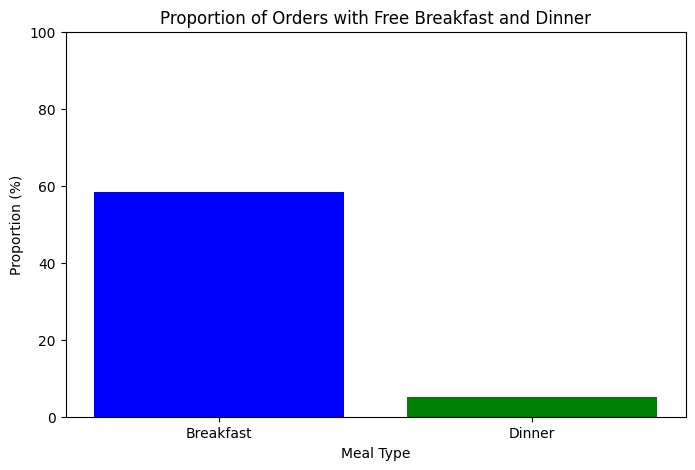

In [17]:
# Your code to answer Question 1
import matplotlib.pyplot as plt

# Your code to answer Question 1

# Convert 'mealinclusiontype' to lowercase
Order_details['mealinclusiontype'] = Order_details['mealinclusiontype'].str.lower()

# calculate the proportions
total_orders = Order_details.shape[0]
free_breakfast_orders = Order_details[Order_details['mealinclusiontype'].str.contains('breakfast', na=False)].shape[0]
free_dinner_orders = Order_details[Order_details['mealinclusiontype'].str.contains('dinner', na=False)].shape[0]

proportion_breakfast = (free_breakfast_orders / total_orders) * 100
proportion_dinner = (free_dinner_orders / total_orders) * 100

print(f"Proportion of orders with free breakfast: {proportion_breakfast:.2f}%")
print(f"Proportion of orders with free dinner: {proportion_dinner:.2f}%")

# Plot
# Data for plotting
meals = ['Breakfast', 'Dinner']
proportions = [proportion_breakfast, proportion_dinner]

# Create bar chart
plt.figure(figsize=(8, 5))
plt.bar(meals, proportions, color=['blue', 'green'])
plt.xlabel('Meal Type')
plt.ylabel('Proportion (%)')
plt.title('Proportion of Orders with Free Breakfast and Dinner')
plt.ylim(0, 100)  # Assuming proportions are percentages

# Show the bar chart
plt.show()

The average price for non-smoking rooms is higher.
Average price for non-smoking rooms: 154.42527424289455
Average price for smoking rooms without requirement: 138.29686799254839


<Figure size 800x500 with 0 Axes>

<BarContainer object of 2 artists>

Text(0.5, 0, 'Room Type')

Text(0, 0.5, 'Average Price')

Text(0.5, 1.0, 'Comparison of Average Prices: Non-Smoking vs Smoking/No Requirement Rooms')

(0.0, 174.42527424289455)

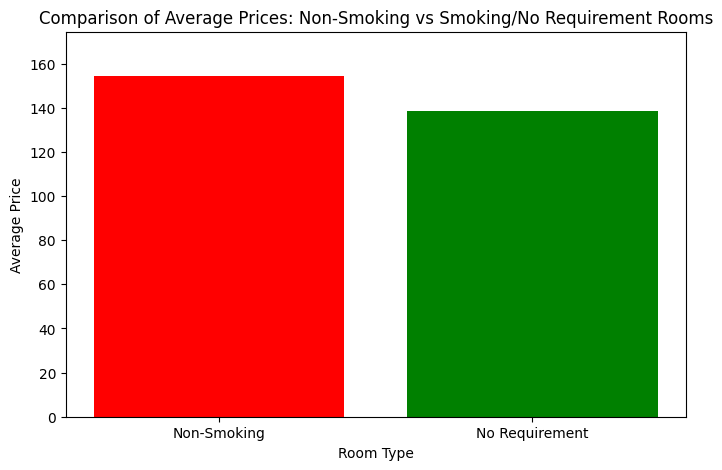

In [18]:
# Your code to answer Question 2
import pandas as pd


Order_details['ratedescription'] = Order_details['ratedescription'].str.lower()

Order_details['is_non_smoking'] = Order_details['ratedescription'].str.contains('non-smoking')

# Calculate the average price for non-smoking rooms
average_price_non_smoking = Order_details[Order_details['is_non_smoking'] == True]['replaced_onsiteprice'].mean()

average_price_smoking = Order_details[Order_details['is_non_smoking'] == False]['replaced_onsiteprice'].mean()

if average_price_non_smoking > average_price_smoking:
    print("The average price for non-smoking rooms is higher.")
elif average_price_non_smoking < average_price_smoking:
    print("The average price for rooms where requirements is not relevant is higher.")
else:
    print("The average prices are the same.")

print(f"Average price for non-smoking rooms: {average_price_non_smoking}")
print(f"Average price for smoking rooms without requirement: {average_price_smoking}")

# Plot
room_types = ['Non-Smoking', 'No Requirement']
average_prices = [average_price_non_smoking, average_price_smoking]

# Create a bar chart
plt.figure(figsize=(8, 5))
plt.bar(room_types, average_prices, color=['red', 'green'])
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.title('Comparison of Average Prices: Non-Smoking vs Smoking/No Requirement Rooms')
plt.ylim(0, max(average_prices) + 20)  # Adjust the y-axis limit for better display

# Show the bar chart
plt.show()

Average price for orders with discount: 140.81364651794254
Average price for orders without discount: 144.93540136559298
Orders with discounts tend to have a lower average price.


<Figure size 800x500 with 0 Axes>

<BarContainer object of 2 artists>

Text(0.5, 0, 'Discount Status')

Text(0, 0.5, 'Average Price')

Text(0.5, 1.0, 'Average Prices: With vs Without Discount')

(0.0, 164.93540136559298)

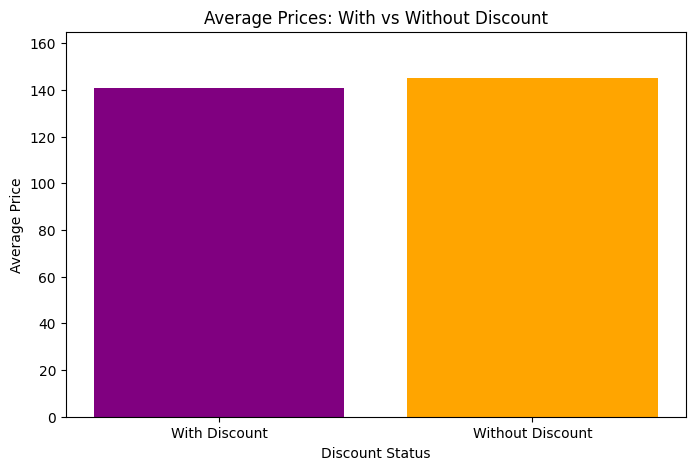

In [19]:
# Your code to answer Question 3


# Add a new column to indicate whether an order has a discount
Order_details['has_discount'] = Order_details['discount'] > 0

# Calculate the average price for orders with and without discount
average_price_with_discount = Order_details[Order_details['has_discount']]['replaced_onsiteprice'].mean()
average_price_without_discount = Order_details[~Order_details['has_discount']]['replaced_onsiteprice'].mean()

print(f"Average price for orders with discount: {average_price_with_discount}")
print(f"Average price for orders without discount: {average_price_without_discount}")

if average_price_with_discount < average_price_without_discount:
    print("Orders with discounts tend to have a lower average price.")
elif average_price_with_discount > average_price_without_discount:
    print("Orders with discounts tend to have a higher average price.")
else:
    print("There's no significant difference in average prices between orders with and without discounts.")

# Plot
discount_status = ['With Discount', 'Without Discount']
average_prices = [average_price_with_discount, average_price_without_discount]

plt.figure(figsize=(8, 5))
plt.bar(discount_status, average_prices, color=['purple', 'orange'])
plt.xlabel('Discount Status')
plt.ylabel('Average Price')
plt.title('Average Prices: With vs Without Discount')
plt.ylim(0, max(average_prices) + 20)  # Adjust the y-axis limit for better display

plt.show()

maxoccupancy
1      134.361126
2      130.921254
3      162.069487
4      201.003857
5      220.171603
6      294.407138
7      377.277143
8      411.410448
9      378.477333
10     679.577000
11     512.740000
12     934.019091
13     746.952000
14     533.357500
15     665.156667
16    1329.190000
17    1595.290000
20     221.020000
24     938.925000
Name: onsiteprice, dtype: float64


<Figure size 1000x800 with 0 Axes>

<Axes: xlabel='maxoccupancy'>

Text(0.5, 0, 'Max Occupancy')

Text(0, 0.5, 'Average Onsite Price')

Text(0.5, 1.0, 'Average Onsite Price by Max Occupancy')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12'),
  Text(12, 0, '13'),
  Text(13, 0, '14'),
  Text(14, 0, '15'),
  Text(15, 0, '16'),
  Text(16, 0, '17'),
  Text(17, 0, '20'),
  Text(18, 0, '24')])

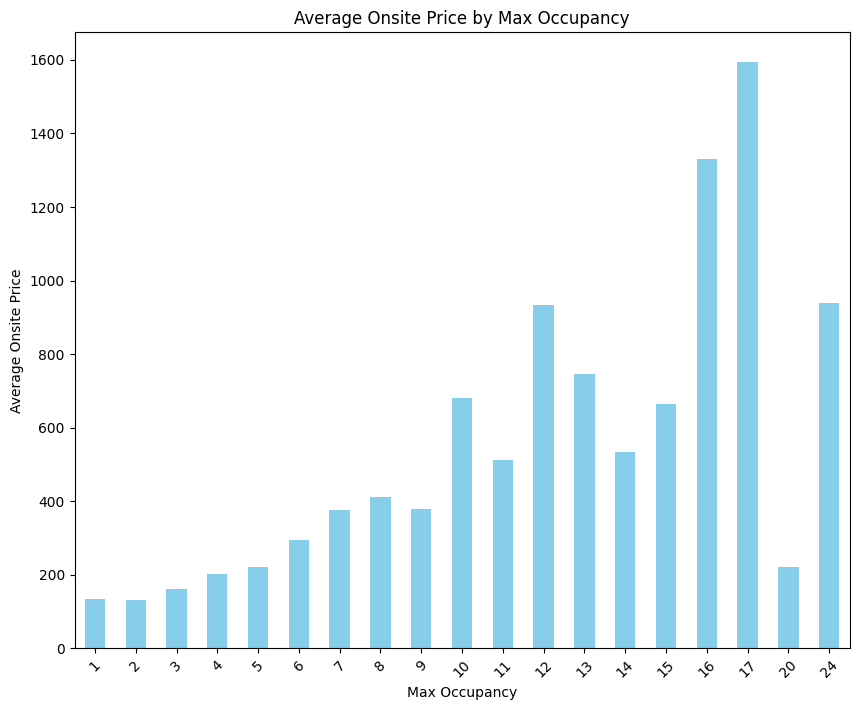

In [20]:
# Your code to answer Question 4

average_prices_by_occupancy = Order_details.groupby('maxoccupancy')['onsiteprice'].mean()


average_prices_sorted = average_prices_by_occupancy.sort_index()

print(average_prices_sorted)

plt.figure(figsize=(10, 8))
average_prices_sorted.plot(kind='bar', color='skyblue')
plt.xlabel('Max Occupancy')
plt.ylabel('Average Onsite Price')
plt.title('Average Onsite Price by Max Occupancy')
plt.xticks(rotation=45)  

plt.show()

Average price for orders with promo: 141.20450047211477
Average price for orders without promo: 137.0007460258854


<Figure size 800x600 with 0 Axes>

<BarContainer object of 2 artists>

Text(0.5, 0, 'Promo Status')

Text(0, 0.5, 'Average Onsite Price')

Text(0.5, 1.0, 'Average Onsite Price: With vs Without Promo')

(0.0, 191.20450047211477)

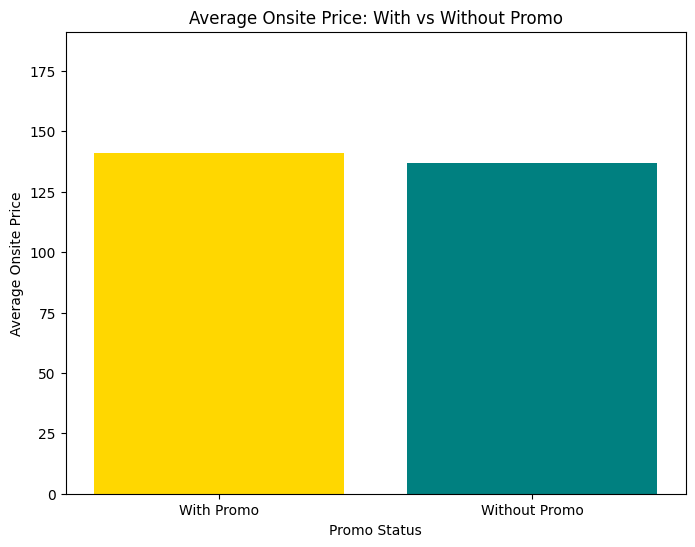

In [21]:
# Your code to answer Question 5

average_price_with_promo = Order_details[Order_details['ispromo'] == 'Y']['onsiteprice'].mean()

average_price_without_promo = Order_details[Order_details['ispromo'] == 'N']['onsiteprice'].mean()

print(f"Average price for orders with promo: {average_price_with_promo}")
print(f"Average price for orders without promo: {average_price_without_promo}")

promo_status = ['With Promo', 'Without Promo']
average_prices = [average_price_with_promo, average_price_without_promo]

plt.figure(figsize=(8, 6))
plt.bar(promo_status, average_prices, color=['gold', 'teal'])
plt.xlabel('Promo Status')
plt.ylabel('Average Onsite Price')
plt.title('Average Onsite Price: With vs Without Promo')
plt.ylim(0, max(average_prices) + 50)  # Adjust the y-axis limit for better display

plt.show()

### Executive Summary & Business insights:


**Note**: You need to use the cell below to write your executive summary & business insights.
If you need more space use enter to go to the next line.


## Write here:


#### Data Description:
We want to describe the details of order dataset, and then find patterns which is interesing and potentially helpful to business. For the whole dataset, basically we are interested in different factors' relationship with price.
#### Problem Result:
1. We are very interested in the provision of breakfast and other free meals. From the result, we can see that the proportion of free breakfast is significantly higher than free dinner. Free breakfast has proportion of 58.44% and proportion of free dinner is 5.12%. We can see that it is very common to have free breakfast, while it is rare to provide free dinner.
2. When camparing the average price of non-smoking orders with those without obvious requirement, we can see that the price for non-smoking rooms is higher. This might be the reason that non-smoking requirement are higher-ranked hotels and charge more.
3. The average price of orders with discount or things without discount are not that different, we can see that using discount is a good way to sell out rooms.
4. Comparing the max occupancy with the average price, we can see that basically with the max occupancy increase, the price of the room increase. But we can see that the average price is basically same for 1, 2 people room.
5. It seems like that orders with promo has higher average price, which indicate that promo might have some infulence on the final price charged.
#### Conclusion:
After doing these problems, we can see that there are some important factors, including non-smoking requirement, using discount, having greater max occupancy and promo all have important influence on price, more research can be done to get more data.

### Grading:

PART 1 - 75 points (85 points with the extra credits in the Bonus Question)

- Question 1: 9 points (6 points for part (a) and 3 points for part (b))
- Question 2: 15 points (9 points for part (a) and 6 points for part (b))
- Question 3: 12 points (9 points for part (a) and 3 points for part (b))
- Question 4: 21 points (9 points for part (a) and 12 points for part (b))
- Question 5: 18 points (9 points for part (a) and 9 points for part (b))
- Bonus Question: 10 points (extra credit): (8 points for part (a) and 2 points for part (b))




PART 2 - 25 points 
- You need to ask five business-related questions (5 points).
- You need to answer these five questions using Python and the two datasets (5 points).
- You need to have at least "5" graphs to visualize your insights (6 points).
- Your executive summary should be well-written (6 points).
- Your results and business insights should be interesting and meaningful (3 points).


Good Luck!